# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
import numpy as np
import pandas as pd
# Import the titanic dataset here

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

In [2]:
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


In [3]:
df_titanic.describe()

,age,ticketno,fare,survived
count,2205.000000,1.316000e+03,1291.000000,2207.000000
mean,30.436735,2.842157e+05,33.404760,0.322157
std,12.159677,6.334726e+05,52.227592,0.467409
min,0.166667,2.000000e+00,3.030500,0.000000
25%,22.000000,1.426225e+04,7.180600,0.000000
50%,29.000000,1.114265e+05,14.090200,0.000000
75%,38.000000,3.470770e+05,31.060750,1.000000
max,74.000000,3.101317e+06,512.060700,1.000000


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [4]:
# Code here
passangers = df_titanic[
    (df_titanic["class"] == "1st") |
    (df_titanic["class"] == "2nd") |
    (df_titanic["class"] == "3rd")
]

ct_counts = pd.crosstab(passangers["class"], passangers["embarked"])

print(passangers)
print(ct_counts)


                                name  gender   age class embarked  \
0                Abbing, Mr. Anthony    male  42.0   3rd        S   
1          Abbott, Mr. Eugene Joseph    male  13.0   3rd        S   
2        Abbott, Mr. Rossmore Edward    male  16.0   3rd        S   
3     Abbott, Mrs. Rhoda Mary 'Rosa'  female  39.0   3rd        S   
4        Abelseth, Miss. Karen Marie  female  16.0   3rd        S   
...                              ...     ...   ...   ...      ...   
1314          Yvois, Miss. Henriette  female  24.0   2nd        S   
1315       Zakarian, Mr. Mapriededer    male  22.0   3rd        C   
1316             Zakarian, Mr. Ortin    male  27.0   3rd        C   
1317               Zenni, Mr. Philip    male  25.0   3rd        C   
1318             Zimmermann, Mr. Leo    male  29.0   3rd        S   

            country  ticketno     fare  survived  
0     United States    5547.0   7.1100         0  
1     United States    2673.0  20.0500         0  
2     United State

## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [5]:
# P(class|embarked)
cond_class_given_embarked = pd.crosstab(
    passangers["class"],
    passangers["embarked"],
    normalize="columns"
)

print(cond_class_given_embarked)


embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481


In [6]:
# P(Embarked∣Class)
cond_embarked_given_class = pd.crosstab(
    passangers["class"],
    passangers["embarked"],
    normalize="index"
)

print(cond_embarked_given_class)

embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756


In [7]:
# P(Embarked = Southampton∣Class = 3rd)
prop_q1 = cond_embarked_given_class.loc["3rd", "S"]

print(prop_q1)

0.6967559943582511


In [8]:
# P(Class = 3rd∣Embarked = Southampton)
prop_q2 = cond_class_given_embarked.loc["3rd", "S"]


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

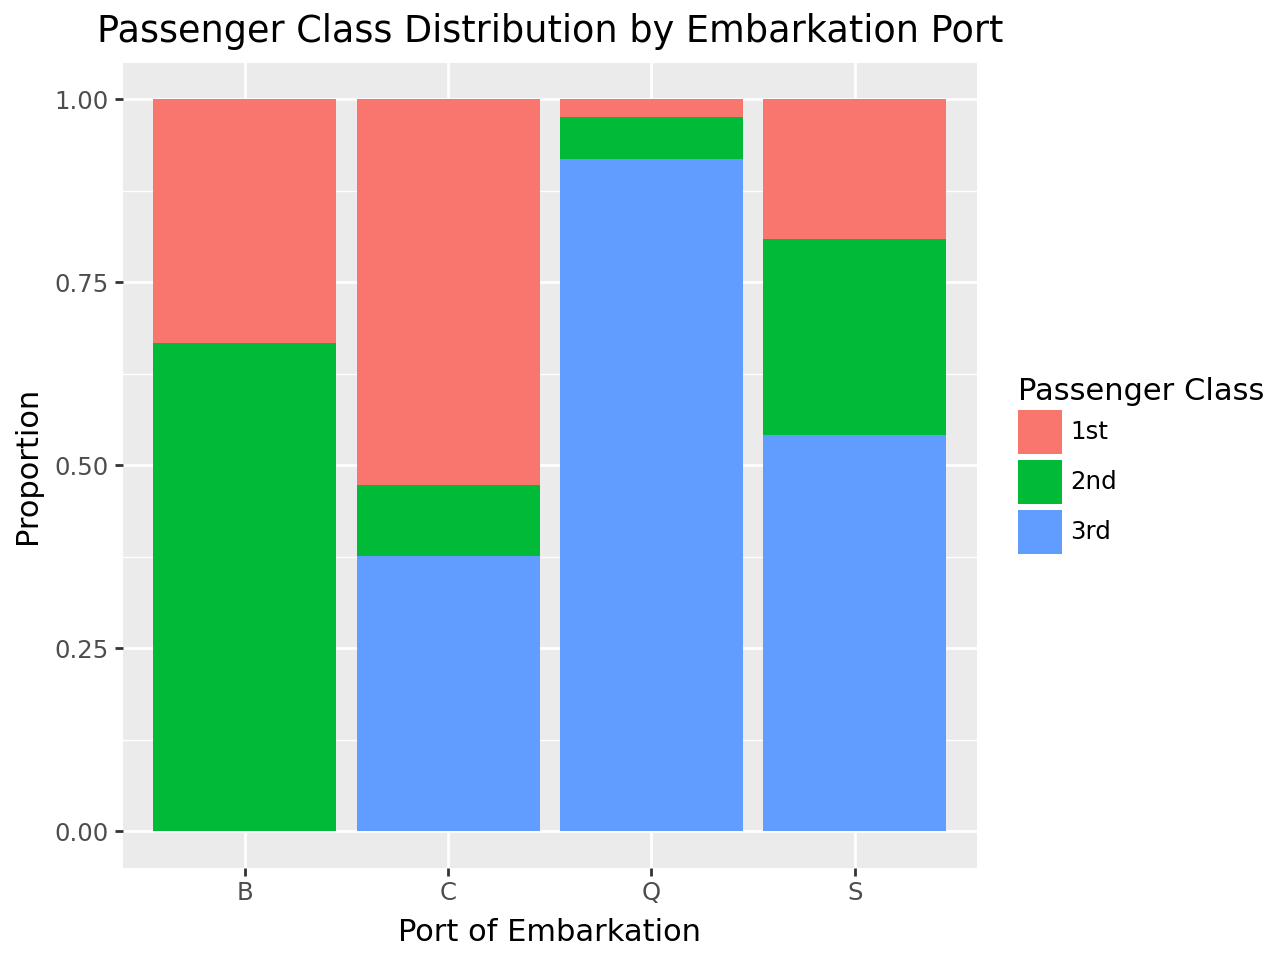

In [9]:
import plotnine as p9

plot1 = (
    p9.ggplot(data=passangers)
    + p9.aes(x="embarked", fill="class")
    + p9.geom_bar(position="fill")
    + p9.labs(
        x="Port of Embarkation",
        y="Proportion",
        title="Passenger Class Distribution by Embarkation Port"
    )
    + p9.scale_fill_discrete(name="Passenger Class")
)

plot1.show()